Script from Chelsey to read classifier results

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import pickle
import glob

import AZKABANML

### Plotting settings

In [163]:

palette = sns.color_palette()
plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 11
BIGGER_SIZE = 13
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

savefigs_path = 'C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/AZKABAN-light/ZoopMix_paper/Figs/'

one_col = 85 *0.0393701
two_col = 170*0.0393701

### Read results for any classifier

In [194]:
# Set paths
path = 'F:/AFKABAN/'
WBATpath = 'F:/AFKABAN/WBAT_data_PNC2023/'
classifypath = 'F:/AFKABAN/Classify/'

df_120 = pd.read_feather(f'{path}/df_120_balanced.feather')
df_200 = pd.read_feather(f'{path}/df_200_balanced.feather')

df_120_sigbs = pd.read_feather(f'{path}/df_120_sigbs_balanced.feather')
df_200_sigbs = pd.read_feather(f'{path}/df_200_sigbs_balanced.feather')

df_120_w_h = pd.read_feather(f'{path}/df_120_w_h_balanced.feather')
df_200_w_h = pd.read_feather(f'{path}/df_200_w_h_balanced.feather')


# Read results

#### kNN

In [242]:
path = r'F:/AFKABAN/Classify'

In [263]:
#kNN_120 = AZKABANML.read_results('kNN_08-05-2023_120_balanced',path)
#kNN_200 = AZKABANML.read_results('kNN_08-05-2023_200_balanced',path)

#kNN_120_minmax= AZKABANML.read_results('kNN_10-05-2023_120_minmax',path)
#kNN_200_minmax = AZKABANML.read_results('kNN_10-05-2023_200_minmax',path)

#kNN_120_sigbs= AZKABANML.read_results('kNN_08-05-2023_120_sigbs',path)
#kNN_200_sigbs = AZKABANML.read_results('kNN_08-05-2023_200_sigbs',path)

kNN_120_norm= AZKABANML.read_results('kNN_07-06-2023_120_norm',path)
kNN_200_norm = AZKABANML.read_results('kNN_07-06-2023_200_norm',path)

kNN_120_w_h= AZKABANML.read_results('kNN_12-06-2023_120_norm_w_h',path)
kNN_200_w_h = AZKABANML.read_results('kNN_12-06-2023_200_norm_w_h',path)


#### LightGBM

In [168]:
#lightGBM_120 = AZKABANML.read_results('lightGBM_08-05-2023_120_balanced',path)
#lightGBM_200 = AZKABANML.read_results('lightGBM_08-05-2023_200_balanced',path)

#lightGBM_120_minmax = AZKABANML.read_results('lightGBM_23-05-2023_120_minmax',path)
#lightGBM_200_minmax = AZKABANML.read_results('lightGBM_23-05-2023_200_minmax',path)


lightGBM_120_norm = AZKABANML.read_results('lightGBM_08-06-2023_120_norm',path)
lightGBM_200_norm = AZKABANML.read_results('lightGBM_08-06-2023_200_norm',path)

lightGBM_120_w_h = AZKABANML.read_results('lightGBM_09-06-2023_120_norm_w_h',path)
#lightGBM_200_norm = AZKABANML.read_results('lightGBM_08-06-2023_200_norm',path)

#### SVC

In [117]:
#SVC_120 = AZKABANML.read_results('SVC_08-05-2023_120_balanced',path)
#SVC_200 = AZKABANML.read_results('SVC_08-05-2023_200_balanced',path)

#SVC_120_minmax = AZKABANML.read_results('SVC_23-05-2023_120_minmax',path)
#SVC_200_minmax = AZKABANML.read_results('SVC_23-05-2023_200_minmax',path)

SVC_120_norm = AZKABANML.read_results('SVC_12-06-2023_120_norm',path)
SVC_200_norm = AZKABANML.read_results('SVC_12-06-2023_200_norm',path)

#### gNB

In [55]:
gNB_120 = AZKABANML.read_results('gNB_02-05-2023_120',path)
gNB_200 = AZKABANML.read_results('gNB_02-05-2023_200',path)

# Model Parameters

## Print best params

In [72]:
lightGBM_120_norm['best_params']['learner']

LGBMClassifier(boosting_type='goss', colsample_bytree=0.7809633132836477,
               learning_rate=0.017215392284894805, max_delta_step=0,
               max_depth=7, min_child_weight=2, n_estimators=4600,
               num_leaves=28, objective='binary',
               reg_alpha=0.0009712999580650016, reg_lambda=2.0454429537368877,
               scale_pos_weight=1, seed=4, subsample=0.5855450214468267)

In [57]:
SVC_120_minmax['best_params']

{'learner': SVC(C=1.7478498299796177, coef0=0.7712015894592644,
     decision_function_shape='ovo', degree=5, kernel='poly', random_state=4,
     tol=0.00021721347685542503),
 'preprocs': (MinMaxScaler(feature_range=(0.0, 1.0)),),
 'ex_preprocs': ()}

# Nested Cross-Validation

## Print F1 score results

#### 120 kHz

In [59]:
classifier_list = [kNN_120, lightGBM_120, SVC_120, gNB_120]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: lightGBM_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.99 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.99 ± 0.01

Classifier: SVC_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.02
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.02

Classifier: gNB_02-05-2023_120
Mean class-weighted F1 score for : 0.88 ± 0.04
Mean F1 score for Atlantic cod: 0.87 ± 0.05
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.86 ± 0.05


##### 200 kHz

In [60]:
classifier_list = [kNN_200, lightGBM_200, SVC_200, gNB_200]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: lightGBM_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.99 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: SVC_08-05-2023_200_balanced
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.97 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.01
Mean F1 score for Polar cod: 0.97 ± 0.02

Classifier: gNB_02-05-2023_200
Mean class-weighted F1 score for : 0.78 ± 0.03
Mean F1 score for Atlantic cod: 0.68 ± 0.05
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.74 ± 0.04


LightGBM and SVC are equally good, slightly better than kNN. gNB is worst, will not repeat.

Better results with 120 for the poorer performing algorithms (kNN and gNB)

## Compare preprocessing minmax, normalizer, sigbs, balanced

In [61]:
classifier_list = [kNN_120_sigbs, kNN_120, kNN_120_norm,kNN_120_minmax]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_08-05-2023_120_sigbs
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_08-05-2023_120_balanced
Mean class-weighted F1 score for : 0.99 ± 0.0
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01

Classifier: kNN_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.96 ± 0.01
Mean F1 score for Atlantic cod: 0.95 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.94 ± 0.02

Classifier: kNN_10-05-2023_120_minmax
Mean class-weighted F1 score for : 0.99 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 1.0 ± 0.0
Mean F1 score for Polar cod: 0.98 ± 0.01


In [161]:
classifier_list = [kNN_200_sigbs, kNN_200, kNN_200_norm,kNN_200_minmax]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)

NameError: name 'kNN_200_sigbs' is not defined

In [140]:
classifier_list = [kNN_120_norm, lightGBM_120_norm, SVC_120_norm]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_07-06-2023_120_norm
Mean class-weighted F1 score for : 0.96 ± 0.01
Mean F1 score for Atlantic cod: 0.95 ± 0.02
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.94 ± 0.02

Classifier: lightGBM_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.96 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02

Classifier: SVC_06-06-2023_120_norm
Mean class-weighted F1 score for : 0.97 ± 0.02
Mean F1 score for Atlantic cod: 0.96 ± 0.02
Mean F1 score for Northern shrimp: 0.99 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.03


In [139]:
classifier_list = [kNN_200_norm, lightGBM_200_norm, SVC_200_norm]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_07-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.97 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02

Classifier: lightGBM_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.97 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.96 ± 0.01

Classifier: SVC_06-06-2023_200_norm
Mean class-weighted F1 score for : 0.96 ± 0.01
Mean F1 score for Atlantic cod: 0.97 ± 0.01
Mean F1 score for Northern shrimp: 0.97 ± 0.01
Mean F1 score for Polar cod: 0.94 ± 0.02


In [265]:
classifier_list = [kNN_120_w_h, kNN_200_w_h]
for class_i in classifier_list:
    print('\nClassifier: '+class_i['name'])
    AZKABANML.print_F1_mean(class_i)


Classifier: kNN_12-06-2023_120_norm_w_h
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.96 ± 0.01
Mean F1 score for Herring: 1.0 ± 0.0
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.95 ± 0.02

Classifier: kNN_12-06-2023_200_norm_w_h
Mean class-weighted F1 score for : 0.98 ± 0.01
Mean F1 score for Atlantic cod: 0.98 ± 0.01
Mean F1 score for Herring: 1.0 ± 0.0
Mean F1 score for Northern shrimp: 0.98 ± 0.01
Mean F1 score for Polar cod: 0.96 ± 0.02


Improvement of ~0.2 on the Mean class-weighted F1 score with preprocessing (any.)

## Print mesocosm detection values

## Plot confusion matrix

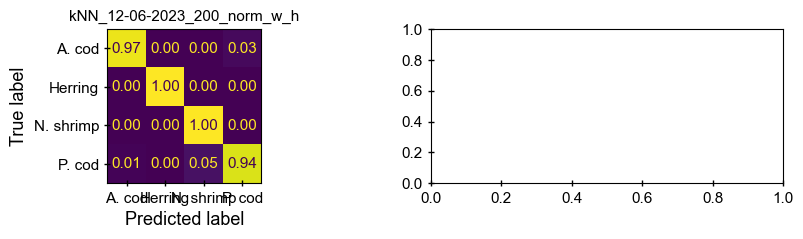

In [259]:
classifier_list = [kNN_200_w_h]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'Herring', 'N. shrimp','P. cod']
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.9,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1

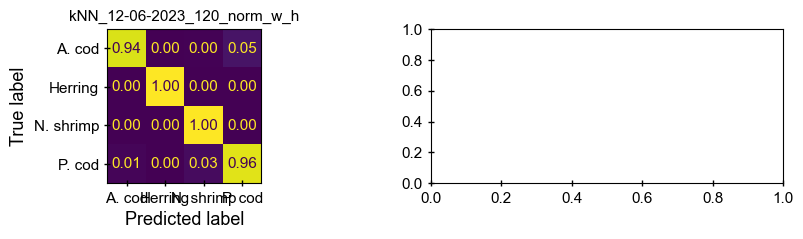

In [261]:
classifier_list = [kNN_120_w_h]
fig,ax = plt.subplots(1,2,figsize=(10,2))
axes = ax.flatten()
labels = ['A. cod', 'Herring', 'N. shrimp','P. cod']
i=0
for class_i in classifier_list:
    cmp = ConfusionMatrixDisplay(class_i['cv_df'].Outer_confusion_matrix.mean()/69.5,
                             display_labels=labels)
    cmp.plot(ax=axes[i], colorbar=False, values_format='.2f')
    axes[i].set(title=class_i['name']);
    i += 1

Observations:
- normalized confusion matrix
- In all algorithms some Atlantic cod are being classified as Polar cod. More in kNN, less  with lightGBM

# Plot predictions

In [159]:
def plot_pred(classifier, ax):
    pred_df = classifier['pred_df']
    ax.bar(pred_df.Prediction.value_counts().index,
            pred_df.Prediction.value_counts().values,
            color='k')
    ax.set_xlabel('Species')
    ax.set_title(classifier['name'])
    ax.set_ylabel('Count')

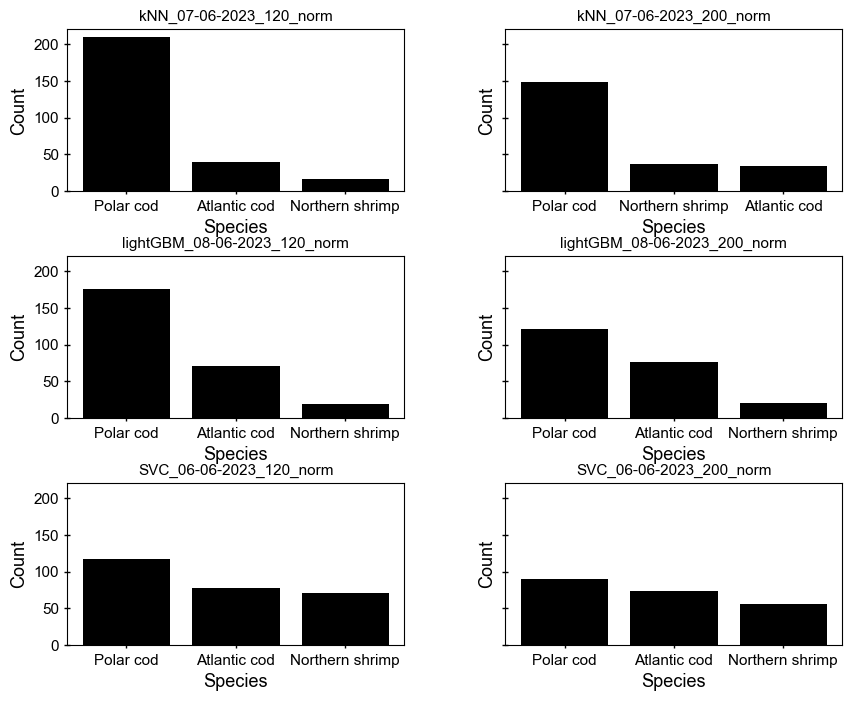

In [160]:
fig,ax = plt.subplots(3,2,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=.4, wspace=0.3)
axes = ax.flatten()
plot_pred(kNN_120_norm, ax=axes[0])
plot_pred(kNN_200_norm, ax=axes[1])
plot_pred(lightGBM_120_norm, ax=axes[2])
plot_pred(lightGBM_200_norm, ax=axes[3])
plot_pred(SVC_120_norm, ax=axes[4])
plot_pred(SVC_200_norm, ax=axes[5])

In [246]:
def compare_TS(classifier, model_df):
    pred_df = classifier['pred_df']
    
    species = model_df.Species.unique()
    
    fig, ax = plt.subplots(1, len(species), figsize=(8,3),sharex=True,sharey=True)
    axes = ax.flatten()
    
    
    #model freqs
    freqs_all = model_df.columns[:-1].to_numpy()
    freqs_model = freqs_all
    freqs_model = freqs_model.astype('float64')
    
    
    freqs_all_pred = pred_df.columns[:-1].to_numpy()

    freqs_pred = freqs_all_pred
    freqs_pred = freqs_pred.astype('float64')

    for i in range(len(axes)):
        spectra_model = model_df[model_df.Species == species[i]].iloc[:,:-1]
        spectra_model = spectra_model.astype('float64')
        
        line_meso = axes[i].plot(freqs_model,spectra_model.T,color=palette[0], alpha=0.1)
        
       # axes[i].fill_between(freqs_model,
                     #   spectra_model.quantile(q=0.25),
                     #   spectra_model.quantile(q=0.75),
                      #  alpha=0.4,
                      #  color=palette[0])

        axes[i].set_title(species[i], fontsize=BIGGER_SIZE, fontweight='bold')

    for i in range(len(axes)):
        spectra_pred = pred_df[pred_df.Prediction == species[i]].iloc[:,:-1]
        spectra_pred = spectra_pred.astype('float64')
        
        line_probe = axes[i].plot(freqs_pred,spectra_pred.T, color='k', alpha=0.05)
        #axes[i].fill_between(freqs_pred,
                        #spectra_pred.quantile(q=0.25),
                        #spectra_pred.quantile(q=0.75),
                        #alpha=0.4,
                        #color=palette[1])

        axes[i].set_xlabel('Frequency (kHz)')

    axes[0].set_ylabel('TS (dB re 1 $\mathregular{m^2}$)')
    leg = axes[-1].legend([line_meso[0], line_probe[0]], ['Mesocosm', 'Probe'])
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
        
    plt.tight_layout()
    plt.show()

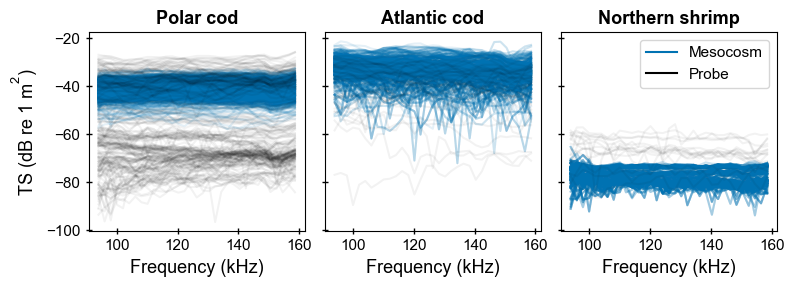

In [236]:
compare_TS(kNN_120_norm, df_120)

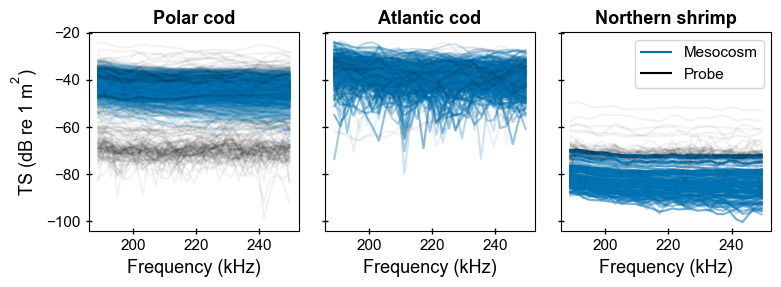

In [225]:
compare_TS(kNN_200_norm, df_200)

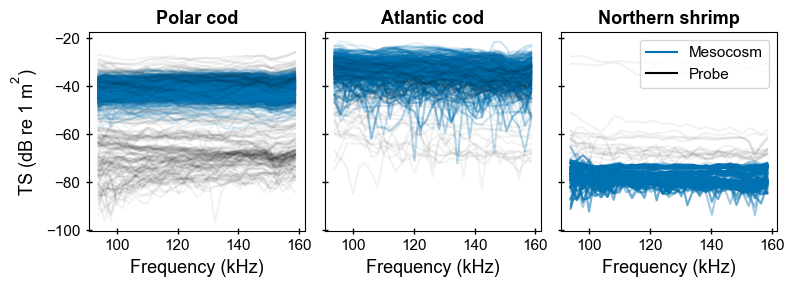

In [226]:
compare_TS(lightGBM_120_norm, df_120)

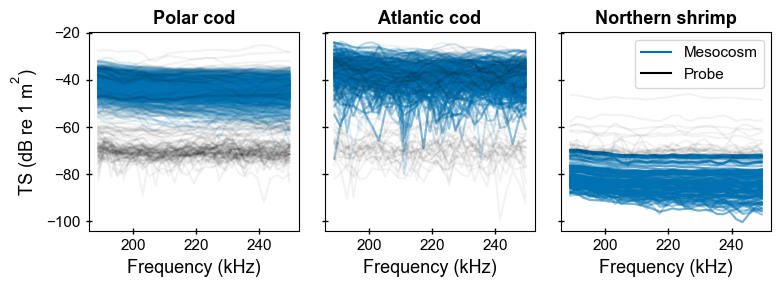

In [227]:
compare_TS(lightGBM_200_norm, df_200)

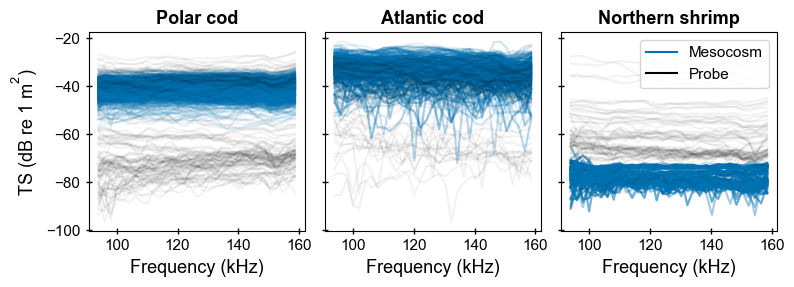

In [228]:
compare_TS(SVC_120_norm, df_120)

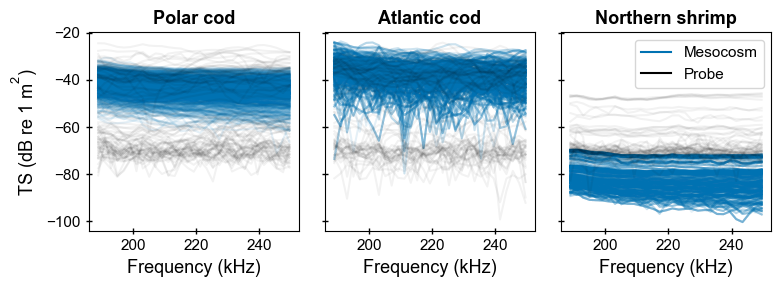

In [229]:
compare_TS(SVC_200_norm, df_200)

In [230]:
# With herring

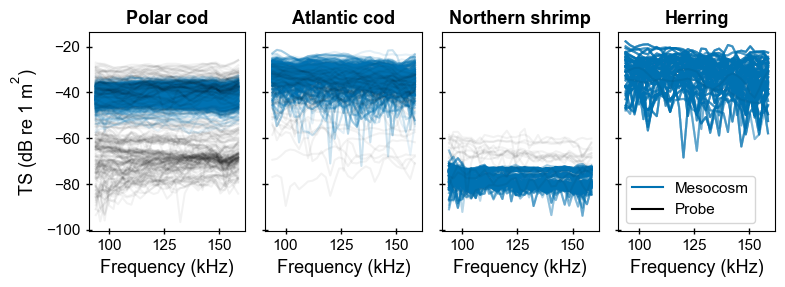

In [247]:
compare_TS(kNN_120_w_h, df_120_w_h)

IndexError: list index out of range

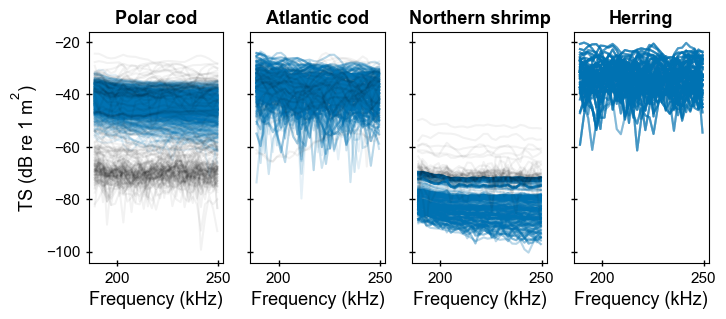

In [248]:
compare_TS(kNN_200_w_h, df_200_w_h)

IndexError: list index out of range

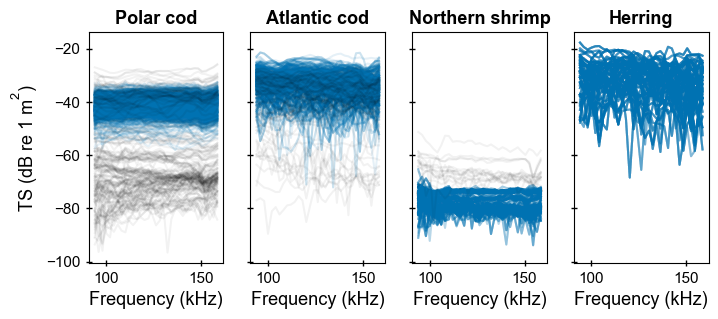

In [249]:
compare_TS(lightGBM_120_w_h, df_120_w_h)